In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import os

import config

In [55]:
sns.set_theme()

In [56]:
df = pd.read_csv(config.DSSRC)
df_no_wifi = df[df["wifi"] == 0]
df_wifi = df[df["wifi"] != 0]
df.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Task 2

In [57]:
dictionary_all = {
    "support_dual_sim" : np.count_nonzero(df["dual_sim"],axis=0),
    "support_3g" : np.count_nonzero(df["three_g"], axis=0),
    "n_cores_max" : df["n_cores"].max(),
    "battery_power_mean_average" : df["battery_power"].mean(),
    "battery_power_deviation" : df["battery_power"].std(),
    "battery_power_median" : df["battery_power"].median(),
    "battery_power_quantile_2_5" : df["battery_power"].quantile(2/5)
}

In [58]:
dictionary_no_wifi = {
    "support_dual_sim" : np.count_nonzero(df_no_wifi["dual_sim"],axis=0),
    "support_3g" : np.count_nonzero(df_no_wifi["three_g"], axis=0),
    "n_cores_max" : df_no_wifi["n_cores"].max(),
    "battery_power_mean_average" : df_no_wifi["battery_power"].mean(),
    "battery_power_deviation" : df_no_wifi["battery_power"].std(),
    "battery_power_median" : df_no_wifi["battery_power"].median(),
    "battery_power_quantile_2_5" : df_no_wifi["battery_power"].quantile(2/5)
}

In [59]:
dictionary_wifi = {
    "support_dual_sim" : np.count_nonzero(df_wifi["dual_sim"],axis=0),
    "support_3g" : np.count_nonzero(df_wifi["three_g"], axis=0),
    "n_cores_max" : df_wifi["n_cores"].max(),
    "battery_power_mean_average" : df_wifi["battery_power"].mean(),
    "battery_power_deviation" : df_wifi["battery_power"].std(),
    "battery_power_median" : df_wifi["battery_power"].median(),
    "battery_power_quantile_2_5" : df_wifi["battery_power"].quantile(2/5)
}

In [60]:
dictionary = {
    "all" : dictionary_all,
    "no_wifi" : dictionary_no_wifi,
    "wifi" : dictionary_wifi
}

In [61]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

json_dict = json.dumps(dictionary, indent=2, cls=NpEncoder)
with open(config.OUTSRC, "w") as outfile:
    outfile.write(json_dict)

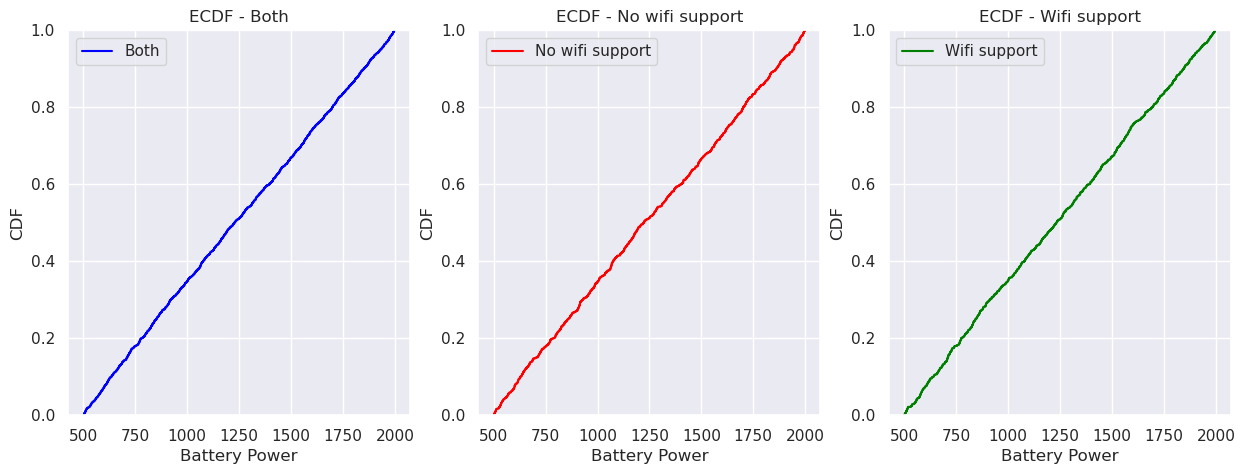

In [62]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.ecdfplot(df['battery_power'], ax=ax[0], color='blue', label='Both', linestyle='-')
ax[0].set_title('ECDF - Both')
ax[0].set_xlabel('Battery Power')
ax[0].set_ylabel('CDF')
ax[0].legend()

sns.ecdfplot(df_no_wifi['battery_power'], ax=ax[1], color='red', label='No wifi support', linestyle='-')
ax[1].set_title('ECDF - No wifi support')
ax[1].set_xlabel('Battery Power')
ax[1].set_ylabel('CDF')
ax[1].legend()

sns.ecdfplot(df_wifi['battery_power'], ax=ax[2], color='green', label='Wifi support', linestyle='-')
ax[2].set_title('ECDF - Wifi support')
ax[2].set_xlabel('Battery Power')
ax[2].set_ylabel('CDF')
ax[2].legend()

plt.show()

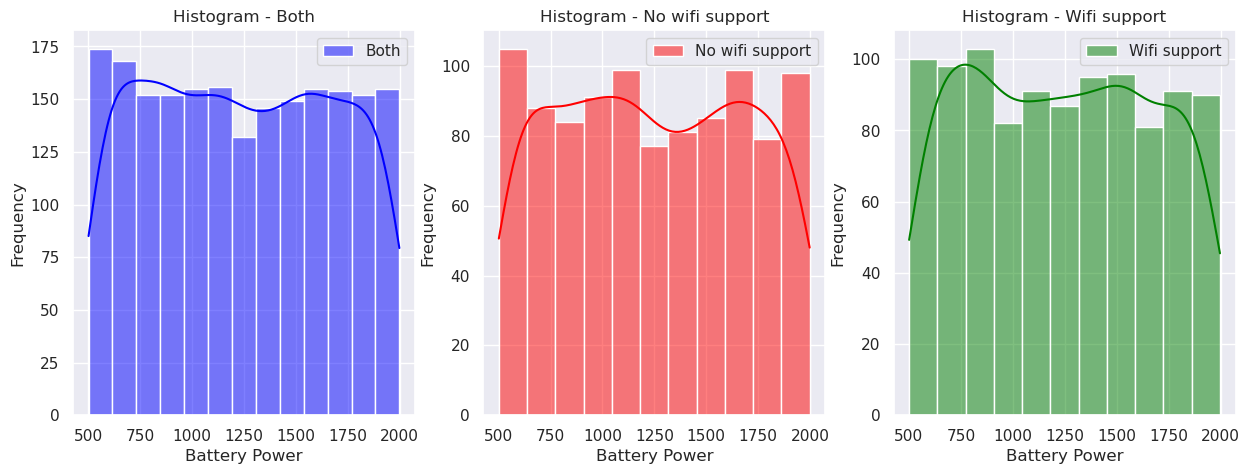

In [63]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['battery_power'], ax=ax[0], color='blue', label='Both', kde=True)
ax[0].set_title('Histogram - Both')
ax[0].set_xlabel('Battery Power')
ax[0].set_ylabel('Frequency')
ax[0].legend()

sns.histplot(df_no_wifi['battery_power'], ax=ax[1], color='red', label='No wifi support', kde=True)
ax[1].set_title('Histogram - No wifi support')
ax[1].set_xlabel('Battery Power')
ax[1].set_ylabel('Frequency')
ax[1].legend()

sns.histplot(df_wifi['battery_power'], ax=ax[2], color='green', label='Wifi support', kde=True)
ax[2].set_title('Histogram - Wifi support')
ax[2].set_xlabel('Battery Power')
ax[2].set_ylabel('Frequency')
ax[2].legend()

plt.show()

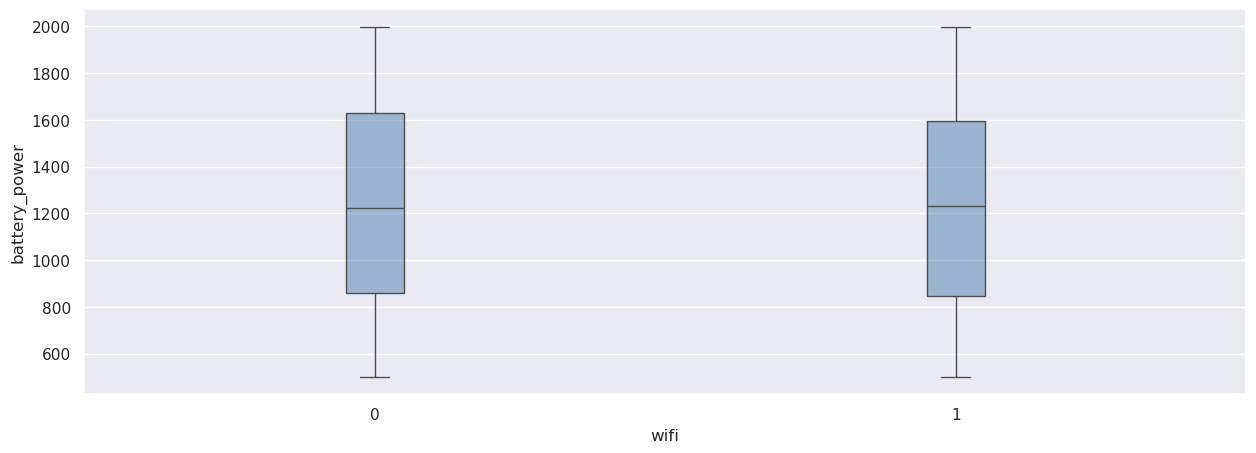

In [64]:

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax = sns.boxplot(data=df,x="wifi" ,y="battery_power", width=0.1, boxprops={"facecolor": (.3, .5, .7, .5)})
plt.show()